# Importation of Librariries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
import json
import random
from datetime import datetime, timedelta
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import joblib

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importation of Data

In [3]:
# Set the path to the directory containing your folders
path = "Clips"

In [4]:
# Get a list of all the folders in the directory
folder_list = os.listdir(path)

In [5]:
# Create a DataFrame with one column that contains the folder names
df = pd.DataFrame({'Folder Name': folder_list})

In [6]:
# Display the DataFrame
print(df)

                  Folder Name
0     E143868_20210507_105428
1     E143868_20210507_110348
2     E143868_20210507_112507
3     E143868_20210507_120215
4     E143868_20210507_121043
...                       ...
7139  W808808_20221129_143900
7140  W808808_20221129_144751
7141  W808808_20221129_145135
7142  W808808_20230301_100655
7143  W808808_20230328_133220

[7144 rows x 1 columns]


In [7]:
df

,Folder Name
0,E143868_20210507_105428
1,E143868_20210507_110348
2,E143868_20210507_112507
3,E143868_20210507_120215
4,E143868_20210507_121043
...,...
7139,W808808_20221129_143900
7140,W808808_20221129_144751
7141,W808808_20221129_145135
7142,W808808_20230301_100655


# Data Preprocessing

In [8]:
# Filter the DataFrame to keep only the folders that start with 'W00'
df_filtered = df[df['Folder Name'].str.startswith('W00')]

In [9]:
# Display the filtered DataFrame
print(df_filtered)

                  Folder Name
3729  W005643_20210409_080050
3730  W005643_20210507_043202
3731  W005643_20210507_105712
3732  W005643_20210507_110927
3733  W005643_20210507_111321
...                       ...
7128  W005643_20230329_052453
7129  W005643_20230329_052710
7130  W005643_20230403_085049
7131  W005643_20230403_085216
7132  W005643_20230403_085406

[3404 rows x 1 columns]


In [10]:
df_filtered

,Folder Name
3729,W005643_20210409_080050
3730,W005643_20210507_043202
3731,W005643_20210507_105712
3732,W005643_20210507_110927
3733,W005643_20210507_111321
...,...
7128,W005643_20230329_052453
7129,W005643_20230329_052710
7130,W005643_20230403_085049
7131,W005643_20230403_085216


In [11]:
# Reset the index of the filtered DataFrame
df_filtered = df_filtered.reset_index(drop=True)

In [12]:
df_filtered

,Folder Name
0,W005643_20210409_080050
1,W005643_20210507_043202
2,W005643_20210507_105712
3,W005643_20210507_110927
4,W005643_20210507_111321
...,...
3399,W005643_20230329_052453
3400,W005643_20230329_052710
3401,W005643_20230403_085049
3402,W005643_20230403_085216


In [13]:
# Add a new column to indicate if each folder contains a JSON file
df_filtered['Contains JSON'] = [bool(glob.glob(os.path.join(path, folder, '*.json'))) for folder in df_filtered['Folder Name']]

In [14]:
df_filtered

,Folder Name,Contains JSON
0,W005643_20210409_080050,False
1,W005643_20210507_043202,True
2,W005643_20210507_105712,True
3,W005643_20210507_110927,True
4,W005643_20210507_111321,True
...,...,...
3399,W005643_20230329_052453,True
3400,W005643_20230329_052710,True
3401,W005643_20230403_085049,True
3402,W005643_20230403_085216,True


In [15]:
# Count the number of folders with and without JSON files
count_json = df_filtered['Contains JSON'].value_counts()

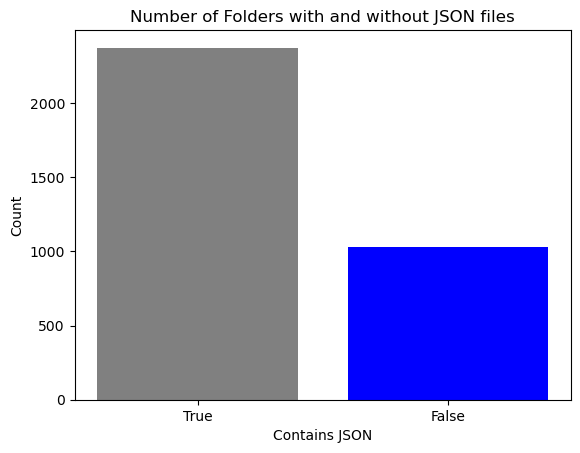

In [16]:
# Create a bar chart to show the counts
plt.bar(count_json.index.astype(str), count_json.values, color=['grey', 'blue'])
plt.title("Number of Folders with and without JSON files")
plt.xlabel("Contains JSON")
plt.ylabel("Count")
plt.show()

In [17]:
# Get the count of folders with JSON files and without JSON files
count_with_json = count_json[True] if True in count_json.index else 0
count_without_json = count_json[False] if False in count_json.index else 0

# Print the counts
print(f"Folders with JSON files: {count_with_json}")
print(f"Folders without JSON files: {count_without_json}")

Folders with JSON files: 2374
Folders without JSON files: 1030


In [18]:
# Filter the DataFrame to keep only the rows with a JSON file
df_with_json = df_filtered[df_filtered['Contains JSON']]

# Reset the index of the filtered DataFrame
df_with_json = df_with_json.reset_index(drop=True)

In [19]:
# Print the new DataFrame
print(df_with_json)

                  Folder Name  Contains JSON
0     W005643_20210507_043202           True
1     W005643_20210507_105712           True
2     W005643_20210507_110927           True
3     W005643_20210507_111321           True
4     W005643_20210507_112522           True
...                       ...            ...
2369  W005643_20230329_052453           True
2370  W005643_20230329_052710           True
2371  W005643_20230403_085049           True
2372  W005643_20230403_085216           True
2373  W005643_20230403_085406           True

[2374 rows x 2 columns]


In [20]:
df_with_json

,Folder Name,Contains JSON
0,W005643_20210507_043202,True
1,W005643_20210507_105712,True
2,W005643_20210507_110927,True
3,W005643_20210507_111321,True
4,W005643_20210507_112522,True
...,...,...
2369,W005643_20230329_052453,True
2370,W005643_20230329_052710,True
2371,W005643_20230403_085049,True
2372,W005643_20230403_085216,True


In [21]:
# Drop the "Contains JSON" column
df_with_json = df_with_json.drop("Contains JSON", axis=1)

In [22]:
df_with_json

,Folder Name
0,W005643_20210507_043202
1,W005643_20210507_105712
2,W005643_20210507_110927
3,W005643_20210507_111321
4,W005643_20210507_112522
...,...
2369,W005643_20230329_052453
2370,W005643_20230329_052710
2371,W005643_20230403_085049
2372,W005643_20230403_085216


In [23]:
# Add the new columns with null values
df_with_json = df_with_json.assign(
    Deviation=np.nan,
    Maneuver=np.nan,
    WeatherCondition=np.nan,
    ParkingGarage=np.nan,
    DrivingMode=np.nan,
    ArtificialLight=np.nan,
    DynamicObjects=np.nan,
    DirectionChange=np.nan,
    LightCondition=np.nan,
    ParkingManeuver=np.nan,
    Seasons=np.nan,
    StaticObjects=np.nan,
    Location=np.nan
)

In [24]:
# Print the new DataFrame
print(df_with_json)

                  Folder Name  Deviation  Maneuver  WeatherCondition  \
0     W005643_20210507_043202        NaN       NaN               NaN   
1     W005643_20210507_105712        NaN       NaN               NaN   
2     W005643_20210507_110927        NaN       NaN               NaN   
3     W005643_20210507_111321        NaN       NaN               NaN   
4     W005643_20210507_112522        NaN       NaN               NaN   
...                       ...        ...       ...               ...   
2369  W005643_20230329_052453        NaN       NaN               NaN   
2370  W005643_20230329_052710        NaN       NaN               NaN   
2371  W005643_20230403_085049        NaN       NaN               NaN   
2372  W005643_20230403_085216        NaN       NaN               NaN   
2373  W005643_20230403_085406        NaN       NaN               NaN   

      ParkingGarage  DrivingMode  ArtificialLight  DynamicObjects  \
0               NaN          NaN              NaN             NaN 

In [25]:
df_with_json

,Folder Name,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,ParkingManeuver,Seasons,StaticObjects,Location
0,W005643_20210507_043202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W005643_20210507_105712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W005643_20210507_110927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W005643_20210507_111321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W005643_20210507_112522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,W005643_20230329_052453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2370,W005643_20230329_052710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2371,W005643_20230403_085049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2372,W005643_20230403_085216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# Rename the 'Folder Name' column to 'Clips'
df_with_json = df_with_json.rename(columns={'Folder Name': 'Clip'})

In [27]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,ParkingManeuver,Seasons,StaticObjects,Location
0,W005643_20210507_043202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W005643_20210507_105712,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W005643_20210507_110927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W005643_20210507_111321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W005643_20210507_112522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,W005643_20230329_052453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2370,W005643_20230329_052710,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2371,W005643_20230403_085049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2372,W005643_20230403_085216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
features = ['Deviation', 'Maneuver', 'WeatherCondition', 'ParkingGarage', 'DrivingMode', 'ArtificialLight', 'DynamicObjects', 'DirectionChange', 'LightCondition', 'ParkingManeuver', 'Seasons', 'StaticObjects', 'Location']

for feature in features:
    for folder in df_with_json['Clip']:
        folder_path = os.path.join(path, folder)
        json_file = [f for f in os.listdir(folder_path) if f.endswith('.json')][0]
        json_path = os.path.join(folder_path, json_file)
        with open(json_path, 'r') as f:
            try:
                data = json.load(f)
                if 'prelabels' in data and any(d['category'] == feature for d in data['prelabels']):
                    feature_label = [d['label'] for d in data['prelabels'] if d['category'] == feature][0]
                    df_with_json.loc[df_with_json['Clip'] == folder, feature] = feature_label
            except (FileNotFoundError, json.JSONDecodeError):
                continue


In [29]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,ParkingManeuver,Seasons,StaticObjects,Location
0,W005643_20210507_043202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W005643_20210507_105712,NaN,NaN,WC_CLOUDY,NaN,DM_TRAJECTORY,NaN,NaN,NaN,LC_DAY,NaN,NaN,NaN,LOC_14
2,W005643_20210507_110927,NaN,NaN,WC_CLOUDY,NaN,DM_1,NaN,NaN,NaN,LC_DAY,NaN,NaN,NaN,LOC_14
3,W005643_20210507_111321,NaN,NaN,WC_CLOUDY,NaN,DM_2,NaN,NaN,NaN,LC_DAY,NaN,NaN,NaN,LOC_14
4,W005643_20210507_112522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,PIO_2_PARK_OUT,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,LOC_05_VDC
2370,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,PIO_2_PARK_OUT,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,LOC_05_VDC
2371,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,PIO_1_PARK_IN,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,NaN
2372,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,PIO_1_PARK_IN,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,NaN


In [30]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,ParkingManeuver,Seasons,StaticObjects,Location
0,W005643_20210507_043202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W005643_20210507_105712,NaN,NaN,WC_CLOUDY,NaN,DM_TRAJECTORY,NaN,NaN,NaN,LC_DAY,NaN,NaN,NaN,LOC_14
2,W005643_20210507_110927,NaN,NaN,WC_CLOUDY,NaN,DM_1,NaN,NaN,NaN,LC_DAY,NaN,NaN,NaN,LOC_14
3,W005643_20210507_111321,NaN,NaN,WC_CLOUDY,NaN,DM_2,NaN,NaN,NaN,LC_DAY,NaN,NaN,NaN,LOC_14
4,W005643_20210507_112522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,PIO_2_PARK_OUT,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,LOC_05_VDC
2370,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,PIO_2_PARK_OUT,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,LOC_05_VDC
2371,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,PIO_1_PARK_IN,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,NaN
2372,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,PIO_1_PARK_IN,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,NaN


In [31]:
Max_Nan= 6
df_with_json = df_with_json.dropna(thresh=len(df_with_json.columns) - Max_Nan)

In [32]:
df_with_json = df_with_json.reset_index(drop=True)
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,ParkingManeuver,Seasons,StaticObjects,Location
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,PIO_1_PARK_IN,SEA_1_GREEN_TREES,SOBJ_1_NO_SOBJ_PRESENT,LOC_10_VDC
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,PIO_1_PARK_IN,SEA_1_GREEN_TREES,SOBJ_1_NO_SOBJ_PRESENT,LOC_10_VDC
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,PIO_1_PARK_IN,SEA_1_GREEN_TREES,SOBJ_1_NO_SOBJ_PRESENT,LOC_10_VDC
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,PIO_1_PARK_IN,SEA_1_GREEN_TREES,SOBJ_1_NO_SOBJ_PRESENT,LOC_10_VDC
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,PIO_1_PARK_IN,SEA_1_GREEN_TREES,SOBJ_1_NO_SOBJ_PRESENT,LOC_10_VDC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,PIO_2_PARK_OUT,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,LOC_05_VDC
1367,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,PIO_2_PARK_OUT,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,LOC_05_VDC
1368,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,PIO_1_PARK_IN,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,NaN
1369,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,PIO_1_PARK_IN,SEA_3_TREES_WITHOUT_LEAVES,SOBJ_1_NO_SOBJ_PRESENT,NaN


In [33]:
# Add the new columns with null values
df_with_json = df_with_json.assign(
    VID_START_FRAME=np.nan,
    VID_START_ELV=np.nan,
    VID_START_LAT=np.nan,
    VID_START_LNG=np.nan,
    VID_START_TSTMP=np.nan,
    SCN_START_FRAME=np.nan,
    SCN_START_ELV=np.nan,
    SCN_START_LAT=np.nan,
    SCN_START_LNG=np.nan,
    SCN_START_TSTMP=np.nan,
    VID_END_FRAME=np.nan,
    VID_END_ELV=np.nan,
    VID_END_LAT=np.nan,
    VID_END_LNG=np.nan,
    VID_END_TSTMP=np.nan,
    SCN_END_FRAME=np.nan,
    SCN_END_ELV=np.nan,
    SCN_END_LAT=np.nan,
    SCN_END_LNG=np.nan,
    SCN_END_TSTMP=np.nan,
)

In [34]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1367,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1368,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1369,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
for i, folder in enumerate(df_with_json['Clip']):
    folder_path = os.path.join(path, folder)
    json_file = [f for f in os.listdir(folder_path) if f.endswith('.json')][0]
    json_path = os.path.join(folder_path, json_file)
    with open(json_path, 'r') as f:
        try:
            data = json.load(f)
            if 'prelabels' in data:
                for prelabel in data['prelabels']:
                    if prelabel['category'] == 'Deviation':
                        state = prelabel['state']
                        prefix = 'VID_START_' if state == 'activated' else 'VID_END_'
                        df_with_json.loc[i, prefix + 'FRAME'] = prelabel['frame_number']
                        df_with_json.loc[i, prefix + 'LAT'] = prelabel['postion_coordinates']['latitude']
                        df_with_json.loc[i, prefix + 'LNG'] = prelabel['postion_coordinates']['longitude']
                        df_with_json.loc[i, prefix + 'ELV'] = prelabel['postion_coordinates']['elevation']
                        df_with_json.loc[i, prefix + 'TSTMP'] = prelabel['timestamp']
        except (FileNotFoundError, json.JSONDecodeError):
            continue

In [36]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,26174.0,161.747955,51.532577,13.923871,1.658992e+18,NaN,NaN,NaN,NaN,NaN
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,37692.0,161.700439,51.532568,13.923874,1.658992e+18,NaN,NaN,NaN,NaN,NaN
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,46871.0,161.616364,51.532579,13.923849,1.658992e+18,NaN,NaN,NaN,NaN,NaN
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,68361.0,161.693481,51.532558,13.923879,1.658993e+18,NaN,NaN,NaN,NaN,NaN
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,73512.0,161.669037,51.532569,13.923867,1.658993e+18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,42790.0,172.195954,51.536982,13.931810,1.680068e+18,NaN,NaN,NaN,NaN,NaN
1367,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,47866.0,172.177706,51.536987,13.931814,1.680068e+18,NaN,NaN,NaN,NaN,NaN
1368,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,10156.0,161.579668,51.533998,13.925585,1.680512e+18,NaN,NaN,NaN,NaN,NaN
1369,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13288.0,161.804583,51.533999,13.926085,1.680512e+18,NaN,NaN,NaN,NaN,NaN


In [37]:
for folder in df_with_json['Clip']:
    folder_path = os.path.join(path, folder)
    json_file = [f for f in os.listdir(folder_path) if f.endswith('.json')][0]
    json_path = os.path.join(folder_path, json_file)
    with open(json_path, 'r') as f:
        try:
            data = json.load(f)
            if 'prelabels' in data:
                prelabels = data['prelabels']
                for prelabel in prelabels:
                    if 'label' in prelabel and prelabel['label'] == 'SCN_1_START':
                        timestamp = prelabel['timestamp']
                        frame_number = prelabel['frame_number']
                        latitude = prelabel['postion_coordinates']['latitude']
                        longitude = prelabel['postion_coordinates']['longitude']
                        elevation = prelabel['postion_coordinates']['elevation']
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_START_TSTMP'] = timestamp
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_START_FRAME'] = frame_number
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_START_LAT'] = latitude
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_START_LNG'] = longitude
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_START_ELV'] = elevation
                        break  # Exit the loop after finding the first matching prelabel
        except (FileNotFoundError, json.JSONDecodeError):
            continue

In [38]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,26174.0,161.747955,51.532577,13.923871,1.658992e+18,NaN,NaN,NaN,NaN,NaN
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,37692.0,161.700439,51.532568,13.923874,1.658992e+18,NaN,NaN,NaN,NaN,NaN
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,46871.0,161.616364,51.532579,13.923849,1.658992e+18,NaN,NaN,NaN,NaN,NaN
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,68361.0,161.693481,51.532558,13.923879,1.658993e+18,NaN,NaN,NaN,NaN,NaN
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,73512.0,161.669037,51.532569,13.923867,1.658993e+18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,42790.0,172.195954,51.536982,13.931810,1.680068e+18,NaN,NaN,NaN,NaN,NaN
1367,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,47866.0,172.177706,51.536987,13.931814,1.680068e+18,NaN,NaN,NaN,NaN,NaN
1368,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,10156.0,161.579668,51.533998,13.925585,1.680512e+18,NaN,NaN,NaN,NaN,NaN
1369,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13288.0,161.804583,51.533999,13.926085,1.680512e+18,NaN,NaN,NaN,NaN,NaN


In [39]:
for folder in df_with_json['Clip']:
    folder_path = os.path.join(path, folder)
    json_file = [f for f in os.listdir(folder_path) if f.endswith('.json')][0]
    json_path = os.path.join(folder_path, json_file)
    with open(json_path, 'r') as f:
        try:
            data = json.load(f)
            if 'prelabels' in data:
                prelabels = data['prelabels']
                for prelabel in prelabels:
                    if 'label' in prelabel and prelabel['label'] == 'SCN_2_STOP':
                        timestamp = prelabel['timestamp']
                        frame_number = prelabel['frame_number']
                        latitude = prelabel['postion_coordinates']['latitude']
                        longitude = prelabel['postion_coordinates']['longitude']
                        elevation = prelabel['postion_coordinates']['elevation']
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_END_TSTMP'] = timestamp
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_END_FRAME'] = frame_number
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_END_LAT'] = latitude
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_END_LNG'] = longitude
                        df_with_json.loc[df_with_json['Clip'] == folder, 'SCN_END_ELV'] = elevation
                        break  # Exit the loop after finding the first matching prelabel
        except (FileNotFoundError, json.JSONDecodeError):
            continue

In [40]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,26174.0,161.747955,51.532577,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,37692.0,161.700439,51.532568,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,46871.0,161.616364,51.532579,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,68361.0,161.693481,51.532558,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,73512.0,161.669037,51.532569,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,42790.0,172.195954,51.536982,13.931810,1.680068e+18,42502.0,172.204427,51.536982,13.931810,1.680068e+18
1367,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,47866.0,172.177706,51.536987,13.931814,1.680068e+18,47686.0,172.190775,51.536987,13.931814,1.680068e+18
1368,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,10156.0,161.579668,51.533998,13.925585,1.680512e+18,10084.0,161.681696,51.533997,13.925585,1.680512e+18
1369,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13288.0,161.804583,51.533999,13.926085,1.680512e+18,13144.0,161.803271,51.533999,13.926085,1.680512e+18


In [41]:
df_with_json.head(300).to_csv('flask_data.csv', index=False)

In [42]:
# Define the feature sets
feature_sets = [
    ['VID_START_TSTMP', 'SCN_START_TSTMP', 'SCN_END_TSTMP', 'VID_END_TSTMP'],
    ['VID_START_FRAME', 'SCN_START_FRAME', 'SCN_END_FRAME', 'VID_END_FRAME']
]

# Create sub-dataframes for each feature set
sub_dataframes = []
for features in feature_sets:
    sub_dataframe = df_with_json[features].copy()
    sub_dataframe['Clip ID'] = df_with_json['Clip']
    sub_dataframes.append(sub_dataframe)

# Display sub-dataframes
timestamp_df = pd.concat(sub_dataframes[0:1], axis=1)
frame_number_df = pd.concat(sub_dataframes[1:2], axis=1)

print("Timestamp DataFrame:")
print(timestamp_df)
print()

print("Frame Number DataFrame:")
print(frame_number_df)
print()

Timestamp DataFrame:
      VID_START_TSTMP  SCN_START_TSTMP  SCN_END_TSTMP  VID_END_TSTMP  \
0        1.658992e+18     1.658992e+18   1.658992e+18   1.658992e+18   
1        1.658992e+18     1.658992e+18   1.658992e+18   1.658992e+18   
2        1.658992e+18     1.658992e+18   1.658992e+18   1.658992e+18   
3        1.658993e+18     1.658993e+18   1.658993e+18   1.658993e+18   
4        1.658993e+18     1.658993e+18   1.658993e+18   1.658993e+18   
...               ...              ...            ...            ...   
1366     1.680067e+18     1.680068e+18   1.680068e+18   1.680068e+18   
1367     1.680068e+18     1.680068e+18   1.680068e+18   1.680068e+18   
1368     1.680512e+18              NaN   1.680512e+18   1.680512e+18   
1369     1.680512e+18     1.680512e+18   1.680512e+18   1.680512e+18   
1370     1.680512e+18     1.680512e+18   1.680512e+18   1.680512e+18   

                      Clip ID  
0     W005643_20220728_065839  
1     W005643_20220728_070350  
2     W005643_2022

In [43]:
timestamp_df

,VID_START_TSTMP,SCN_START_TSTMP,SCN_END_TSTMP,VID_END_TSTMP,Clip ID
0,1.658992e+18,1.658992e+18,1.658992e+18,1.658992e+18,W005643_20220728_065839
1,1.658992e+18,1.658992e+18,1.658992e+18,1.658992e+18,W005643_20220728_070350
2,1.658992e+18,1.658992e+18,1.658992e+18,1.658992e+18,W005643_20220728_070804
3,1.658993e+18,1.658993e+18,1.658993e+18,1.658993e+18,W005643_20220728_071829
4,1.658993e+18,1.658993e+18,1.658993e+18,1.658993e+18,W005643_20220728_072054
...,...,...,...,...,...
1366,1.680067e+18,1.680068e+18,1.680068e+18,1.680068e+18,W005643_20230329_052453
1367,1.680068e+18,1.680068e+18,1.680068e+18,1.680068e+18,W005643_20230329_052710
1368,1.680512e+18,NaN,1.680512e+18,1.680512e+18,W005643_20230403_085049
1369,1.680512e+18,1.680512e+18,1.680512e+18,1.680512e+18,W005643_20230403_085216


In [44]:
frame_number_df

,VID_START_FRAME,SCN_START_FRAME,SCN_END_FRAME,VID_END_FRAME,Clip ID
0,23831.0,23903.0,26066.0,26174.0,W005643_20220728_065839
1,35028.0,35173.0,37620.0,37692.0,W005643_20220728_070350
2,44316.0,44532.0,46798.0,46871.0,W005643_20220728_070804
3,66666.0,66732.0,68254.0,68361.0,W005643_20220728_071829
4,71836.0,71914.0,73478.0,73512.0,W005643_20220728_072054
...,...,...,...,...,...
1366,40414.0,41206.0,42502.0,42790.0,W005643_20230329_052453
1367,45310.0,46390.0,47686.0,47866.0,W005643_20230329_052710
1368,7816.0,NaN,10084.0,10156.0,W005643_20230403_085049
1369,10912.0,11920.0,13144.0,13288.0,W005643_20230403_085216


# Data Modelling

In [44]:
# Set the initial value of the VALIDITY_SCN_START column as "Invalid"
df_with_json['VALIDITY_SCN_START'] = 'Invalid'

# Update the VALIDITY_SCN_START column based on the conditions
df_with_json.loc[(df_with_json['VID_START_TSTMP'].notnull()) & (df_with_json['SCN_START_TSTMP'].notnull()), 'VALIDITY_SCN_START'] = \
    df_with_json.loc[(df_with_json['VID_START_TSTMP'].notnull()) & (df_with_json['SCN_START_TSTMP'].notnull())].apply(
        lambda row: 'Valid' if (row['SCN_START_TSTMP'] - row['VID_START_TSTMP']) < 30 * 1e9 else 'Invalid', axis=1)



In [45]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP,VALIDITY_SCN_START
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,161.747955,51.532577,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18,Valid
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,161.700439,51.532568,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18,Valid
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,161.616364,51.532579,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18,Valid
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,161.693481,51.532558,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18,Valid
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,161.669037,51.532569,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,172.195954,51.536982,13.931810,1.680068e+18,42502.0,172.204427,51.536982,13.931810,1.680068e+18,Valid
1367,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,172.177706,51.536987,13.931814,1.680068e+18,47686.0,172.190775,51.536987,13.931814,1.680068e+18,Valid
1368,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,161.579668,51.533998,13.925585,1.680512e+18,10084.0,161.681696,51.533997,13.925585,1.680512e+18,Invalid
1369,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,161.804583,51.533999,13.926085,1.680512e+18,13144.0,161.803271,51.533999,13.926085,1.680512e+18,Valid


In [46]:
# Set the initial value of the VALIDITY_SCN_START column as "Invalid"
df_with_json['VALIDITY_SCN_END'] = 'Invalid'

# Update the VALIDITY_SCN_START column based on the conditions
df_with_json.loc[(df_with_json['VID_END_TSTMP'].notnull()) & (df_with_json['SCN_END_TSTMP'].notnull()), 'VALIDITY_SCN_END'] = \
    df_with_json.loc[(df_with_json['VID_END_TSTMP'].notnull()) & (df_with_json['SCN_END_TSTMP'].notnull())].apply(
        lambda row: 'Valid' if (row['VID_END_TSTMP'] - row['SCN_END_TSTMP']) < 10 * 1e9 else 'Invalid', axis=1)


In [47]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP,VALIDITY_SCN_START,VALIDITY_SCN_END
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,51.532577,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18,Valid,Valid
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,51.532568,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18,Valid,Valid
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,51.532579,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18,Valid,Valid
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,51.532558,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18,Valid,Valid
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,51.532569,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18,Valid,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,51.536982,13.931810,1.680068e+18,42502.0,172.204427,51.536982,13.931810,1.680068e+18,Valid,Valid
1367,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,51.536987,13.931814,1.680068e+18,47686.0,172.190775,51.536987,13.931814,1.680068e+18,Valid,Valid
1368,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,51.533998,13.925585,1.680512e+18,10084.0,161.681696,51.533997,13.925585,1.680512e+18,Invalid,Valid
1369,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,51.533999,13.926085,1.680512e+18,13144.0,161.803271,51.533999,13.926085,1.680512e+18,Valid,Valid


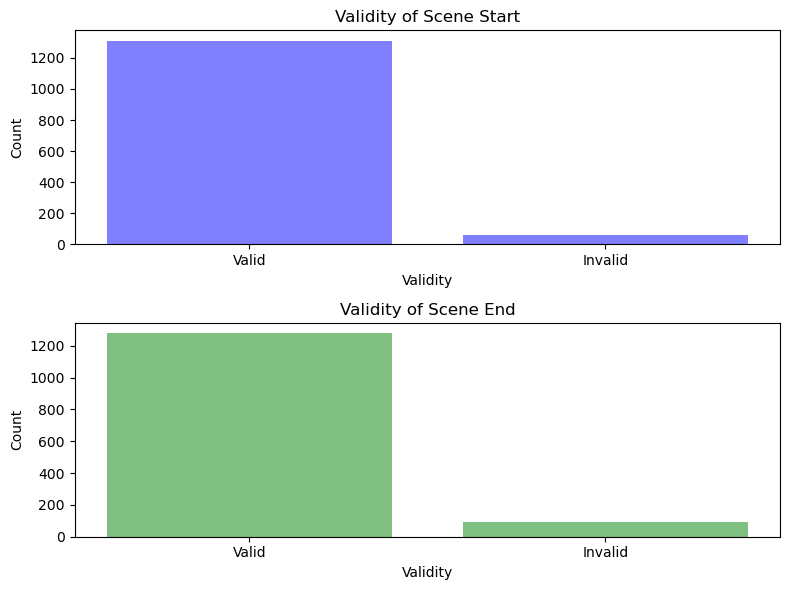

In [48]:
# Count the occurrences of each validity value
validity_counts_start = df_with_json['VALIDITY_SCN_START'].value_counts()
validity_counts_end = df_with_json['VALIDITY_SCN_END'].value_counts()

# Create separate bar plots for Scene Start Validity and Scene End Validity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot for Scene Start Validity
ax1.bar(validity_counts_start.index, validity_counts_start.values, color='blue', alpha=0.5)
ax1.set_xlabel('Validity')
ax1.set_ylabel('Count')
ax1.set_title('Validity of Scene Start')

# Plot for Scene End Validity
ax2.bar(validity_counts_end.index, validity_counts_end.values, color='green', alpha=0.5)
ax2.set_xlabel('Validity')
ax2.set_ylabel('Count')
ax2.set_title('Validity of Scene End')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [49]:
# Create the CLIP_VALIDITY column
df_with_json['CLIP_VALIDITY'] = np.where(
    (df_with_json['VALIDITY_SCN_START'] == 'Invalid') | (df_with_json['VALIDITY_SCN_END'] == 'Invalid'),
    'Invalid',
    'Valid'
)

In [50]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP,VALIDITY_SCN_START,VALIDITY_SCN_END,CLIP_VALIDITY
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18,Valid,Valid,Valid
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18,Valid,Valid,Valid
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18,Valid,Valid,Valid
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18,Valid,Valid,Valid
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18,Valid,Valid,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,13.931810,1.680068e+18,42502.0,172.204427,51.536982,13.931810,1.680068e+18,Valid,Valid,Valid
1367,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,13.931814,1.680068e+18,47686.0,172.190775,51.536987,13.931814,1.680068e+18,Valid,Valid,Valid
1368,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13.925585,1.680512e+18,10084.0,161.681696,51.533997,13.925585,1.680512e+18,Invalid,Valid,Invalid
1369,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13.926085,1.680512e+18,13144.0,161.803271,51.533999,13.926085,1.680512e+18,Valid,Valid,Valid


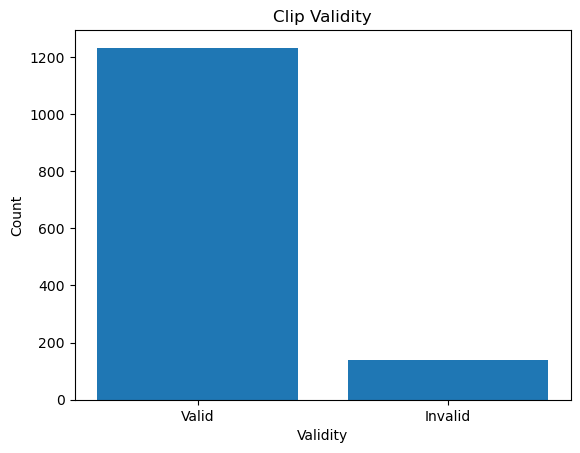

In [51]:
# Count the occurrences of each value in the CLIP_VALIDITY column
validity_counts = df_with_json['CLIP_VALIDITY'].value_counts()

# Create a bar plot
plt.bar(validity_counts.index, validity_counts.values)

# Set the plot title and labels
plt.title('Clip Validity')
plt.xlabel('Validity')
plt.ylabel('Count')

# Show the plot
plt.show()

In [52]:
df_with_json = df_with_json.drop(['VALIDITY_SCN_START', 'VALIDITY_SCN_END', 'CLIP_VALIDITY'], axis=1)


In [53]:
# Exclude numeric columns and 'Clip'
non_numeric_columns = df_with_json.select_dtypes(exclude=[np.number]).drop(columns=['Clip']).columns

# Iterate over non-numeric columns and print unique values
for column in non_numeric_columns:
    unique_values = df_with_json[column].unique()
    print(f"Unique values for column '{column}': {unique_values}")

Unique values for column 'Deviation': ['DEV_1_NO_DEVIATION' 'DEV_3_FIXED_0_75' 'DEV_4_FIXED_1_25'
 'DEV_2_SMALLER_0_5' 'MAN_1_STRAIGHT']
Unique values for column 'Maneuver': ['MAN_1_STRAIGHT' 'MAN_3_CURVED' 'MAN_2_S_SHAPE' nan]
Unique values for column 'WeatherCondition': ['WEA_2_CLOUDY' 'WEA_1_CLEAR' 'WEA_4_FOG' nan 'WEA_3_RAIN' 'WEA_5_SNOWING']
Unique values for column 'ParkingGarage': ['GAR_2_OUTSIDE' 'GAR_1_GARAGE_CARPORT' nan]
Unique values for column 'DrivingMode': ['DRVM_1_00_TO_10_KPH' nan]
Unique values for column 'ArtificialLight': ['STL_2_NO_STREET_LIGHTS' 'STL_1_STREET_LIGHTS']
Unique values for column 'DynamicObjects': ['DOBJ_2_NO_DOBJ_IN_SCENE' 'DOBJ_1_DOBJ_IN_SCENE']
Unique values for column 'DirectionChange': ['DIR_1_DIRECTION_CHANGE' 'DIR_2_FORWARD' nan 'DIR_3_BACKWARDS']
Unique values for column 'LightCondition': ['LC_1_DAY' 'LC_3_TWILIGHT' 'LC_2_NIGHT']
Unique values for column 'ParkingManeuver': ['PIO_1_PARK_IN' 'PIO_2_PARK_OUT' nan]
Unique values for column 'Season

In [54]:
df_with_json

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,26174.0,161.747955,51.532577,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,37692.0,161.700439,51.532568,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,46871.0,161.616364,51.532579,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,68361.0,161.693481,51.532558,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,73512.0,161.669037,51.532569,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1366,W005643_20230329_052453,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,42790.0,172.195954,51.536982,13.931810,1.680068e+18,42502.0,172.204427,51.536982,13.931810,1.680068e+18
1367,W005643_20230329_052710,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_1_CLEAR,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_3_TWILIGHT,...,47866.0,172.177706,51.536987,13.931814,1.680068e+18,47686.0,172.190775,51.536987,13.931814,1.680068e+18
1368,W005643_20230403_085049,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,10156.0,161.579668,51.533998,13.925585,1.680512e+18,10084.0,161.681696,51.533997,13.925585,1.680512e+18
1369,W005643_20230403_085216,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_3_RAIN,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13288.0,161.804583,51.533999,13.926085,1.680512e+18,13144.0,161.803271,51.533999,13.926085,1.680512e+18


# Data Augmetation

In [55]:
import random
import string

# List of non-numeric columns (excluding 'Clip')
non_numeric_columns = [col for col in df_with_json.columns if col != 'Clip' and not df_with_json[col].dtype.kind in 'biufc']

# Create a new empty dataframe for augmented data
augmented_df = pd.DataFrame(columns=df_with_json.columns)

# Iterate for 10 times for data augmentation
for _ in range(10):
    # Create a temporary dataframe to store the augmented data
    temp_df = pd.DataFrame(columns=df_with_json.columns)

    # Iterate over each row in the original dataframe
    for i, row in df_with_json.iterrows():
        # Create a new row for the augmented data
        augmented_row = row.copy()

        # Generate random values for non-numeric columns
        for column in non_numeric_columns:
            possible_values = df_with_json[column].dropna().unique()  # Get unique non-null values for the column
            random_value = random.choice(possible_values)  # Randomly select a value from possible values
            augmented_row[column] = random_value

        # Append the augmented row to the temporary dataframe
        temp_df = temp_df.append(augmented_row, ignore_index=True)

    # Generate random Clip IDs for the temporary dataframe
    temp_df['Clip'] = ['DA' + ''.join(random.choices(string.ascii_uppercase, k=5)) for _ in range(len(temp_df))]

    # Concatenate the augmented data to the final augmented dataframe
    augmented_df = pd.concat([augmented_df, temp_df], ignore_index=True)

# Display the augmented dataframe
print(augmented_df)


          Clip          Deviation        Maneuver WeatherCondition  \
0      DAVSZMY     MAN_1_STRAIGHT   MAN_2_S_SHAPE        WEA_4_FOG   
1      DAOYPLL  DEV_2_SMALLER_0_5   MAN_2_S_SHAPE      WEA_1_CLEAR   
2      DATOSPB   DEV_3_FIXED_0_75   MAN_2_S_SHAPE     WEA_2_CLOUDY   
3      DAHAYAQ   DEV_3_FIXED_0_75   MAN_2_S_SHAPE     WEA_2_CLOUDY   
4      DAUKGUO   DEV_3_FIXED_0_75  MAN_1_STRAIGHT     WEA_2_CLOUDY   
...        ...                ...             ...              ...   
13705  DANKSTU   DEV_3_FIXED_0_75    MAN_3_CURVED        WEA_4_FOG   
13706  DAGGUGM  DEV_2_SMALLER_0_5    MAN_3_CURVED      WEA_1_CLEAR   
13707  DADUUQA  DEV_2_SMALLER_0_5  MAN_1_STRAIGHT     WEA_2_CLOUDY   
13708  DARKLRD   DEV_4_FIXED_1_25  MAN_1_STRAIGHT    WEA_5_SNOWING   
13709  DAKXYWI   DEV_3_FIXED_0_75  MAN_1_STRAIGHT    WEA_5_SNOWING   

              ParkingGarage          DrivingMode         ArtificialLight  \
0      GAR_1_GARAGE_CARPORT  DRVM_1_00_TO_10_KPH  STL_2_NO_STREET_LIGHTS   
1      

In [56]:
augmented_df

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,DAVSZMY,MAN_1_STRAIGHT,MAN_2_S_SHAPE,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,26174.0,161.747955,51.532577,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18
1,DAOYPLL,DEV_2_SMALLER_0_5,MAN_2_S_SHAPE,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,37692.0,161.700439,51.532568,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18
2,DATOSPB,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,46871.0,161.616364,51.532579,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18
3,DAHAYAQ,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,68361.0,161.693481,51.532558,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18
4,DAUKGUO,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_3_TWILIGHT,...,73512.0,161.669037,51.532569,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13705,DANKSTU,DEV_3_FIXED_0_75,MAN_3_CURVED,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_1_DAY,...,42790.0,172.195954,51.536982,13.931810,1.680068e+18,42502.0,172.204427,51.536982,13.931810,1.680068e+18
13706,DAGGUGM,DEV_2_SMALLER_0_5,MAN_3_CURVED,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,47866.0,172.177706,51.536987,13.931814,1.680068e+18,47686.0,172.190775,51.536987,13.931814,1.680068e+18
13707,DADUUQA,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,10156.0,161.579668,51.533998,13.925585,1.680512e+18,10084.0,161.681696,51.533997,13.925585,1.680512e+18
13708,DARKLRD,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_5_SNOWING,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,13288.0,161.804583,51.533999,13.926085,1.680512e+18,13144.0,161.803271,51.533999,13.926085,1.680512e+18


In [57]:
# List of numerical columns
numerical_columns = [col for col in augmented_df.columns if augmented_df[col].dtype.kind in 'biufc']

# Set numerical columns as NaN
augmented_df[numerical_columns] = float('NaN')

In [58]:
augmented_df

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,DAVSZMY,MAN_1_STRAIGHT,MAN_2_S_SHAPE,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,DAOYPLL,DEV_2_SMALLER_0_5,MAN_2_S_SHAPE,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DATOSPB,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DAHAYAQ,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DAUKGUO,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_3_TWILIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13705,DANKSTU,DEV_3_FIXED_0_75,MAN_3_CURVED,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13706,DAGGUGM,DEV_2_SMALLER_0_5,MAN_3_CURVED,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13707,DADUUQA,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13708,DARKLRD,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_5_SNOWING,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
augmented_df.columns

Index(['Clip', 'Deviation', 'Maneuver', 'WeatherCondition', 'ParkingGarage',
       'DrivingMode', 'ArtificialLight', 'DynamicObjects', 'DirectionChange',
       'LightCondition', 'ParkingManeuver', 'Seasons', 'StaticObjects',
       'Location', 'VID_START_FRAME', 'VID_START_ELV', 'VID_START_LAT',
       'VID_START_LNG', 'VID_START_TSTMP', 'SCN_START_FRAME', 'SCN_START_ELV',
       'SCN_START_LAT', 'SCN_START_LNG', 'SCN_START_TSTMP', 'VID_END_FRAME',
       'VID_END_ELV', 'VID_END_LAT', 'VID_END_LNG', 'VID_END_TSTMP',
       'SCN_END_FRAME', 'SCN_END_ELV', 'SCN_END_LAT', 'SCN_END_LNG',
       'SCN_END_TSTMP'],
      dtype='object')

In [60]:
# Specify the numerical columns
numerical_columns = ['VID_START_FRAME', 'VID_START_ELV', 'VID_START_LAT', 'VID_START_LNG', 'VID_START_TSTMP',
                     'SCN_START_FRAME', 'SCN_START_ELV', 'SCN_START_LAT', 'SCN_START_LNG', 'SCN_START_TSTMP',
                     'VID_END_FRAME', 'VID_END_ELV', 'VID_END_LAT', 'VID_END_LNG', 'VID_END_TSTMP',
                     'SCN_END_FRAME', 'SCN_END_ELV', 'SCN_END_LAT', 'SCN_END_LNG', 'SCN_END_TSTMP']

# Iterate over the rows in the augmented dataframe
for i, _ in augmented_df.iterrows():
    # Select a random row from df_with_json
    random_index = random.randint(0, len(df_with_json) - 1)
    random_row = df_with_json.iloc[random_index]
    
    # Assign values from the random row to the augmented dataframe
    for column in df_with_json.columns:
        if column in numerical_columns:
            augmented_df.at[i, column] = random_row[column]

In [61]:
augmented_df

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,DAVSZMY,MAN_1_STRAIGHT,MAN_2_S_SHAPE,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,44874.0,172.717435,51.535960,13.929754,1.670911e+18,44765.0,172.709709,51.535960,13.929754,1.670911e+18
1,DAOYPLL,DEV_2_SMALLER_0_5,MAN_2_S_SHAPE,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,117472.0,142.293516,51.479748,13.845376,1.673598e+18,117363.0,142.289225,51.479748,13.845376,1.673598e+18
2,DATOSPB,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,60740.0,142.346738,51.479745,13.845386,1.673864e+18,60524.0,142.347431,51.479745,13.845386,1.673864e+18
3,DAHAYAQ,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,97446.0,172.239412,51.536837,13.932133,1.676292e+18,97302.0,172.239427,51.536837,13.932133,1.676292e+18
4,DAUKGUO,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_3_TWILIGHT,...,40956.0,163.177948,51.533789,13.918916,1.679309e+18,40632.0,163.178351,51.533789,13.918917,1.679309e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13705,DANKSTU,DEV_3_FIXED_0_75,MAN_3_CURVED,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_1_DAY,...,97347.0,141.575166,51.478164,13.854470,1.673333e+18,97131.0,141.561826,51.478164,13.854470,1.673333e+18
13706,DAGGUGM,DEV_2_SMALLER_0_5,MAN_3_CURVED,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,22705.0,172.721452,51.535958,13.929755,1.670831e+18,22633.0,172.722159,51.535959,13.929755,1.670831e+18
13707,DADUUQA,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,82087.0,160.834660,51.535815,13.914700,1.665820e+18,81980.0,160.843085,51.535815,13.914700,1.665820e+18
13708,DARKLRD,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_5_SNOWING,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,21744.0,172.222708,51.535001,13.924610,1.672921e+18,21636.0,172.208862,51.535001,13.924609,1.672921e+18


In [62]:
augmented_df["VID_START_TSTMP"]

0        1.670911e+18
1        1.673598e+18
2        1.673863e+18
3        1.676291e+18
4        1.679309e+18
             ...     
13705    1.673333e+18
13706    1.670831e+18
13707    1.665820e+18
13708    1.672921e+18
13709    1.674458e+18
Name: VID_START_TSTMP, Length: 13710, dtype: float64

In [63]:
augmented_df["SCN_START_TSTMP"]

0        1.670911e+18
1        1.673598e+18
2        1.673863e+18
3        1.676291e+18
4        1.679309e+18
             ...     
13705    1.673333e+18
13706    1.670831e+18
13707    1.665820e+18
13708    1.672921e+18
13709    1.674458e+18
Name: SCN_START_TSTMP, Length: 13710, dtype: float64

In [64]:
# Iterate over the rows in the augmented dataframe
for i, row in augmented_df.iterrows():
    if pd.isnull(row['VID_START_TSTMP']):
        continue
    
    # Randomly add or subtract 8 seconds to 'VID_START_TSTMP'
    vid_start_timestamp = row['VID_START_TSTMP'] + random.choice([-1, 1]) * 8 * 1e9
    
    # Randomly add or subtract 8 seconds to 'SCN_START_TSTMP'
    scn_start_timestamp = row['SCN_START_TSTMP'] + random.choice([-1, 1]) * 8 * 1e9
    
    # Update the values in the augmented dataframe
    augmented_df.at[i, 'VID_START_TSTMP'] = vid_start_timestamp
    augmented_df.at[i, 'SCN_START_TSTMP'] = scn_start_timestamp


In [65]:
augmented_df

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,DAVSZMY,MAN_1_STRAIGHT,MAN_2_S_SHAPE,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,44874.0,172.717435,51.535960,13.929754,1.670911e+18,44765.0,172.709709,51.535960,13.929754,1.670911e+18
1,DAOYPLL,DEV_2_SMALLER_0_5,MAN_2_S_SHAPE,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,117472.0,142.293516,51.479748,13.845376,1.673598e+18,117363.0,142.289225,51.479748,13.845376,1.673598e+18
2,DATOSPB,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,60740.0,142.346738,51.479745,13.845386,1.673864e+18,60524.0,142.347431,51.479745,13.845386,1.673864e+18
3,DAHAYAQ,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,97446.0,172.239412,51.536837,13.932133,1.676292e+18,97302.0,172.239427,51.536837,13.932133,1.676292e+18
4,DAUKGUO,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_3_TWILIGHT,...,40956.0,163.177948,51.533789,13.918916,1.679309e+18,40632.0,163.178351,51.533789,13.918917,1.679309e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13705,DANKSTU,DEV_3_FIXED_0_75,MAN_3_CURVED,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_1_DAY,...,97347.0,141.575166,51.478164,13.854470,1.673333e+18,97131.0,141.561826,51.478164,13.854470,1.673333e+18
13706,DAGGUGM,DEV_2_SMALLER_0_5,MAN_3_CURVED,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,22705.0,172.721452,51.535958,13.929755,1.670831e+18,22633.0,172.722159,51.535959,13.929755,1.670831e+18
13707,DADUUQA,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,82087.0,160.834660,51.535815,13.914700,1.665820e+18,81980.0,160.843085,51.535815,13.914700,1.665820e+18
13708,DARKLRD,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_5_SNOWING,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,21744.0,172.222708,51.535001,13.924610,1.672921e+18,21636.0,172.208862,51.535001,13.924609,1.672921e+18


In [66]:
augmented_df["VID_START_TSTMP"]

0        1.670911e+18
1        1.673598e+18
2        1.673863e+18
3        1.676291e+18
4        1.679309e+18
             ...     
13705    1.673333e+18
13706    1.670831e+18
13707    1.665820e+18
13708    1.672921e+18
13709    1.674458e+18
Name: VID_START_TSTMP, Length: 13710, dtype: float64

In [67]:
augmented_df["SCN_START_TSTMP"]

0        1.670911e+18
1        1.673598e+18
2        1.673863e+18
3        1.676291e+18
4        1.679309e+18
             ...     
13705    1.673333e+18
13706    1.670831e+18
13707    1.665820e+18
13708    1.672921e+18
13709    1.674458e+18
Name: SCN_START_TSTMP, Length: 13710, dtype: float64

In [68]:
# Iterate over the rows in the augmented dataframe
for i, row in augmented_df.iterrows():
    if pd.isnull(row['SCN_END_TSTMP']) or pd.isnull(row['VID_END_TSTMP']):
        continue
    
    # Randomly add or subtract 3 seconds to 'SCN_END_TSTMP'
    scn_end_timestamp = row['SCN_END_TSTMP'] + random.choice([-1, 1]) * 3 * 1e9
    
    # Randomly add or subtract 3 seconds to 'VID_END_TSTMP'
    vid_end_timestamp = row['VID_END_TSTMP'] + random.choice([-1, 1]) * 3 * 1e9
    
    # Update the values in the augmented dataframe
    augmented_df.at[i, 'SCN_END_TSTMP'] = scn_end_timestamp
    augmented_df.at[i, 'VID_END_TSTMP'] = vid_end_timestamp

In [69]:
augmented_df

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,DAVSZMY,MAN_1_STRAIGHT,MAN_2_S_SHAPE,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,44874.0,172.717435,51.535960,13.929754,1.670911e+18,44765.0,172.709709,51.535960,13.929754,1.670911e+18
1,DAOYPLL,DEV_2_SMALLER_0_5,MAN_2_S_SHAPE,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,117472.0,142.293516,51.479748,13.845376,1.673598e+18,117363.0,142.289225,51.479748,13.845376,1.673598e+18
2,DATOSPB,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,60740.0,142.346738,51.479745,13.845386,1.673864e+18,60524.0,142.347431,51.479745,13.845386,1.673864e+18
3,DAHAYAQ,DEV_3_FIXED_0_75,MAN_2_S_SHAPE,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_3_TWILIGHT,...,97446.0,172.239412,51.536837,13.932133,1.676292e+18,97302.0,172.239427,51.536837,13.932133,1.676292e+18
4,DAUKGUO,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_3_TWILIGHT,...,40956.0,163.177948,51.533789,13.918916,1.679309e+18,40632.0,163.178351,51.533789,13.918917,1.679309e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13705,DANKSTU,DEV_3_FIXED_0_75,MAN_3_CURVED,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_1_DAY,...,97347.0,141.575166,51.478164,13.854470,1.673333e+18,97131.0,141.561826,51.478164,13.854470,1.673333e+18
13706,DAGGUGM,DEV_2_SMALLER_0_5,MAN_3_CURVED,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,22705.0,172.721452,51.535958,13.929755,1.670831e+18,22633.0,172.722159,51.535959,13.929755,1.670831e+18
13707,DADUUQA,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,82087.0,160.834660,51.535815,13.914700,1.665820e+18,81980.0,160.843085,51.535815,13.914700,1.665820e+18
13708,DARKLRD,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_5_SNOWING,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,21744.0,172.222708,51.535001,13.924610,1.672921e+18,21636.0,172.208862,51.535001,13.924609,1.672921e+18


In [70]:
# Concatenate the original dataframe with the augmented dataframe
combined_df = pd.concat([df_with_json, augmented_df], ignore_index=True)

In [71]:
combined_df

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_FRAME,VID_END_ELV,VID_END_LAT,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,26174.0,161.747955,51.532577,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,37692.0,161.700439,51.532568,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,46871.0,161.616364,51.532579,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,68361.0,161.693481,51.532558,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,73512.0,161.669037,51.532569,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,DANKSTU,DEV_3_FIXED_0_75,MAN_3_CURVED,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_1_DAY,...,97347.0,141.575166,51.478164,13.854470,1.673333e+18,97131.0,141.561826,51.478164,13.854470,1.673333e+18
15077,DAGGUGM,DEV_2_SMALLER_0_5,MAN_3_CURVED,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,22705.0,172.721452,51.535958,13.929755,1.670831e+18,22633.0,172.722159,51.535959,13.929755,1.670831e+18
15078,DADUUQA,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,82087.0,160.834660,51.535815,13.914700,1.665820e+18,81980.0,160.843085,51.535815,13.914700,1.665820e+18
15079,DARKLRD,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_5_SNOWING,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,21744.0,172.222708,51.535001,13.924610,1.672921e+18,21636.0,172.208862,51.535001,13.924609,1.672921e+18


In [72]:
# Set the initial value of the VALIDITY_SCN_START column as "Invalid"
combined_df['VALIDITY_SCN_START'] = 'Invalid'

# Update the VALIDITY_SCN_START column based on the conditions
combined_df.loc[(combined_df['VID_START_TSTMP'].notnull()) & (combined_df['SCN_START_TSTMP'].notnull()), 'VALIDITY_SCN_START'] = \
    combined_df.loc[(combined_df['VID_START_TSTMP'].notnull()) & (combined_df['SCN_START_TSTMP'].notnull())].apply(
        lambda row: 'Valid' if (row['SCN_START_TSTMP'] - row['VID_START_TSTMP']) < 30 * 1e9 else 'Invalid', axis=1)

# Set the initial value of the VALIDITY_SCN_START column as "Invalid"
combined_df['VALIDITY_SCN_END'] = 'Invalid'

# Update the VALIDITY_SCN_START column based on the conditions
combined_df.loc[(combined_df['VID_END_TSTMP'].notnull()) & (combined_df['SCN_END_TSTMP'].notnull()), 'VALIDITY_SCN_END'] = \
    combined_df.loc[(combined_df['VID_END_TSTMP'].notnull()) & (combined_df['SCN_END_TSTMP'].notnull())].apply(
        lambda row: 'Valid' if (row['VID_END_TSTMP'] - row['SCN_END_TSTMP']) < 10 * 1e9 else 'Invalid', axis=1)

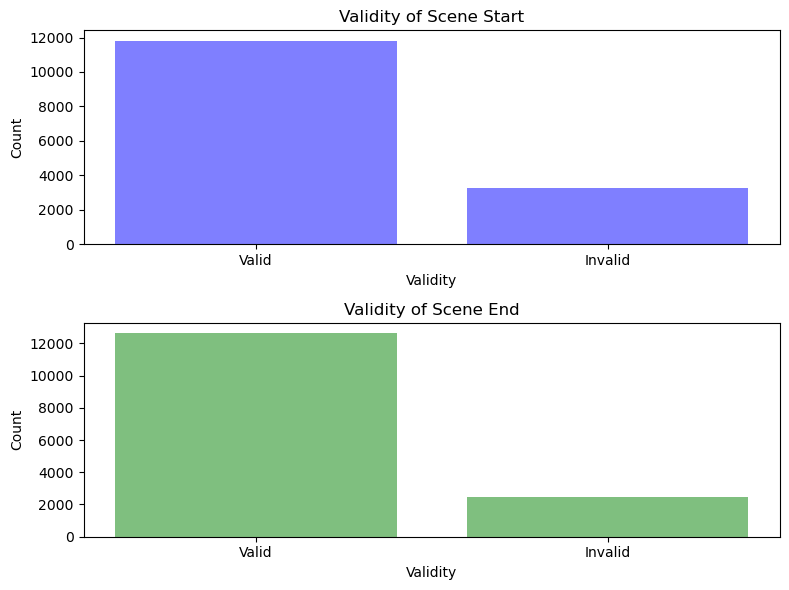

In [73]:
# Count the occurrences of each validity value
validity_counts_start = combined_df['VALIDITY_SCN_START'].value_counts()
validity_counts_end = combined_df['VALIDITY_SCN_END'].value_counts()

# Create separate bar plots for Scene Start Validity and Scene End Validity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Plot for Scene Start Validity
ax1.bar(validity_counts_start.index, validity_counts_start.values, color='blue', alpha=0.5)
ax1.set_xlabel('Validity')
ax1.set_ylabel('Count')
ax1.set_title('Validity of Scene Start')

# Plot for Scene End Validity
ax2.bar(validity_counts_end.index, validity_counts_end.values, color='green', alpha=0.5)
ax2.set_xlabel('Validity')
ax2.set_ylabel('Count')
ax2.set_title('Validity of Scene End')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

In [74]:
# Create the CLIP_VALIDITY column
combined_df['CLIP_VALIDITY'] = np.where(
    (combined_df['VALIDITY_SCN_START'] == 'Invalid') | (combined_df['VALIDITY_SCN_END'] == 'Invalid'),
    'Invalid',
    'Valid'
)

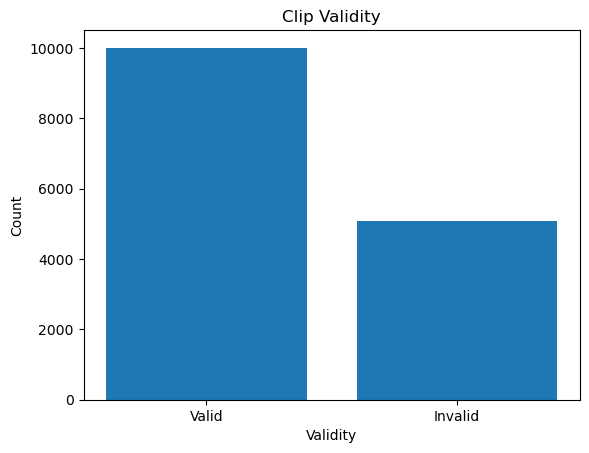

In [75]:
# Count the occurrences of each value in the CLIP_VALIDITY column
validity_counts = combined_df['CLIP_VALIDITY'].value_counts()

# Create a bar plot
plt.bar(validity_counts.index, validity_counts.values)

# Set the plot title and labels
plt.title('Clip Validity')
plt.xlabel('Validity')
plt.ylabel('Count')

# Show the plot
plt.show()

In [76]:
combined_df

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP,VALIDITY_SCN_START,VALIDITY_SCN_END,CLIP_VALIDITY
0,W005643_20220728_065839,DEV_1_NO_DEVIATION,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18,Valid,Valid,Valid
1,W005643_20220728_070350,DEV_3_FIXED_0_75,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18,Valid,Valid,Valid
2,W005643_20220728_070804,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18,Valid,Valid,Valid
3,W005643_20220728_071829,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18,Valid,Valid,Valid
4,W005643_20220728_072054,DEV_1_NO_DEVIATION,MAN_3_CURVED,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18,Valid,Valid,Valid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,DANKSTU,DEV_3_FIXED_0_75,MAN_3_CURVED,WEA_4_FOG,GAR_1_GARAGE_CARPORT,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_1_DAY,...,13.854470,1.673333e+18,97131.0,141.561826,51.478164,13.854470,1.673333e+18,Valid,Valid,Valid
15077,DAGGUGM,DEV_2_SMALLER_0_5,MAN_3_CURVED,WEA_1_CLEAR,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_1_STREET_LIGHTS,DOBJ_1_DOBJ_IN_SCENE,DIR_2_FORWARD,LC_1_DAY,...,13.929755,1.670831e+18,22633.0,172.722159,51.535959,13.929755,1.670831e+18,Valid,Valid,Valid
15078,DADUUQA,DEV_2_SMALLER_0_5,MAN_1_STRAIGHT,WEA_2_CLOUDY,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_1_DIRECTION_CHANGE,LC_1_DAY,...,13.914700,1.665820e+18,81980.0,160.843085,51.535815,13.914700,1.665820e+18,Valid,Valid,Valid
15079,DARKLRD,DEV_4_FIXED_1_25,MAN_1_STRAIGHT,WEA_5_SNOWING,GAR_2_OUTSIDE,DRVM_1_00_TO_10_KPH,STL_2_NO_STREET_LIGHTS,DOBJ_2_NO_DOBJ_IN_SCENE,DIR_3_BACKWARDS,LC_2_NIGHT,...,13.924610,1.672921e+18,21636.0,172.208862,51.535001,13.924609,1.672921e+18,Valid,Valid,Valid


In [77]:
combined_df.to_csv('flask_data_no_encoder.csv', index=False)

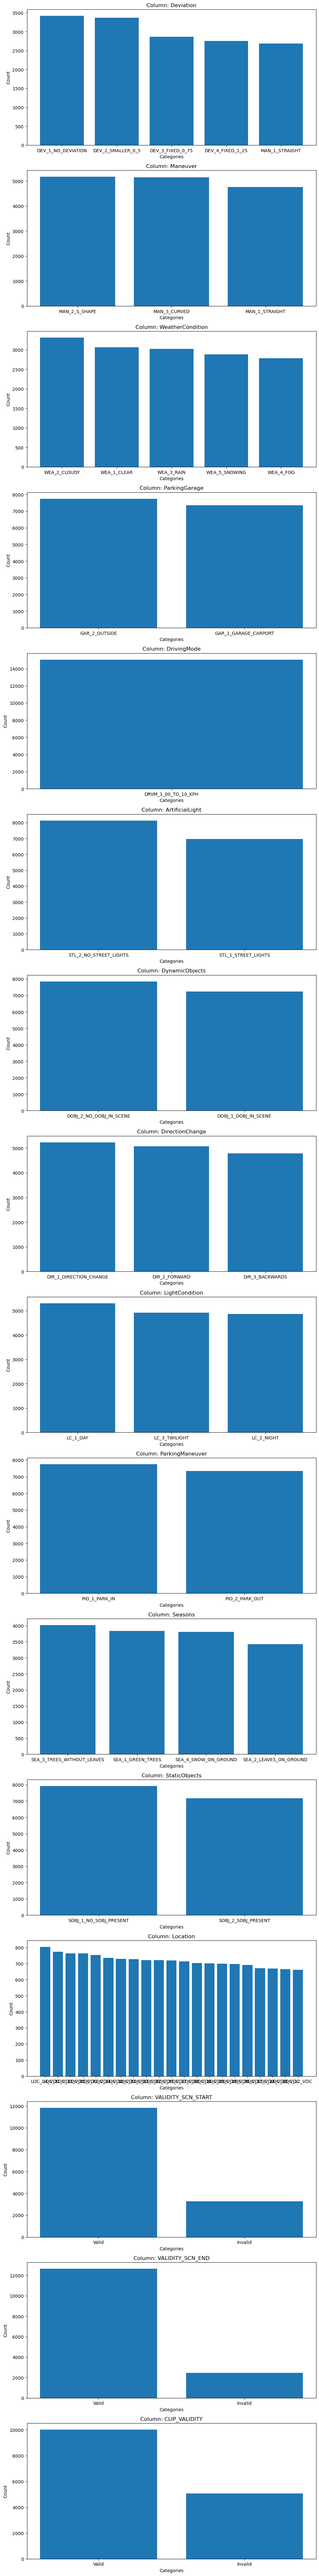

In [78]:
# List of non-numeric columns (excluding 'Clip')
non_numeric_columns = [col for col in combined_df.columns if col != 'Clip' and not combined_df[col].dtype.kind in 'biufc']

# Plotting options
fig, axs = plt.subplots(len(non_numeric_columns), 1, figsize=(10, len(non_numeric_columns) * 5))

# Iterate over each categorical column
for i, column in enumerate(non_numeric_columns):
    # Get unique values and their counts
    values = combined_df[column].value_counts()

    # Create a bar plot
    axs[i].bar(values.index, values.values)

    # Set plot title and labels
    axs[i].set_title(f'Column: {column}')
    axs[i].set_xlabel('Categories')
    axs[i].set_ylabel('Count')
#Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [79]:
# Create a new dataframe with the categorical columns from the combined dataframe
combined_categorical = combined_df[non_numeric_columns]

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

label_mappings = {}
# Iterate over each categorical column and apply label encoding
for column in combined_categorical:
# Extract and store the label encoder mappings for each column

    combined_df[column] = label_encoder.fit_transform(combined_df[column])
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the label encoder mappings for each column
print("Label Encoder Mappings:")
for column, mappings in label_mappings.items():
    print(f"{column}: {mappings}")

Label Encoder Mappings:
Deviation: {'DEV_1_NO_DEVIATION': 0, 'DEV_2_SMALLER_0_5': 1, 'DEV_3_FIXED_0_75': 2, 'DEV_4_FIXED_1_25': 3, 'MAN_1_STRAIGHT': 4}
Maneuver: {'MAN_1_STRAIGHT': 0, 'MAN_2_S_SHAPE': 1, 'MAN_3_CURVED': 2, nan: 3}
WeatherCondition: {'WEA_1_CLEAR': 0, 'WEA_2_CLOUDY': 1, 'WEA_3_RAIN': 2, 'WEA_4_FOG': 3, 'WEA_5_SNOWING': 4, nan: 5}
ParkingGarage: {'GAR_1_GARAGE_CARPORT': 0, 'GAR_2_OUTSIDE': 1, nan: 2}
DrivingMode: {'DRVM_1_00_TO_10_KPH': 0, nan: 1}
ArtificialLight: {'STL_1_STREET_LIGHTS': 0, 'STL_2_NO_STREET_LIGHTS': 1}
DynamicObjects: {'DOBJ_1_DOBJ_IN_SCENE': 0, 'DOBJ_2_NO_DOBJ_IN_SCENE': 1}
DirectionChange: {'DIR_1_DIRECTION_CHANGE': 0, 'DIR_2_FORWARD': 1, 'DIR_3_BACKWARDS': 2, nan: 3}
LightCondition: {'LC_1_DAY': 0, 'LC_2_NIGHT': 1, 'LC_3_TWILIGHT': 2}
ParkingManeuver: {'PIO_1_PARK_IN': 0, 'PIO_2_PARK_OUT': 1, nan: 2}
Seasons: {'SEA_1_GREEN_TREES': 0, 'SEA_2_LEAVES_ON_GROUND': 1, 'SEA_3_TREES_WITHOUT_LEAVES': 2, 'SEA_4_SNOW_ON_GROUND': 3}
StaticObjects: {'SOBJ_1_NO_SOB

In [80]:
for column in combined_categorical:
    print(column)

Deviation
Maneuver
WeatherCondition
ParkingGarage
DrivingMode
ArtificialLight
DynamicObjects
DirectionChange
LightCondition
ParkingManeuver
Seasons
StaticObjects
Location
VALIDITY_SCN_START
VALIDITY_SCN_END
CLIP_VALIDITY


In [81]:
combined_df

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,DrivingMode,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,...,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP,VALIDITY_SCN_START,VALIDITY_SCN_END,CLIP_VALIDITY
0,W005643_20220728_065839,0,0,1,1,0,1,1,0,0,...,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18,1,1,1
1,W005643_20220728_070350,2,0,1,1,0,1,0,0,0,...,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18,1,1,1
2,W005643_20220728_070804,3,0,1,1,0,1,0,0,0,...,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18,1,1,1
3,W005643_20220728_071829,0,2,1,1,0,1,1,1,0,...,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18,1,1,1
4,W005643_20220728_072054,0,2,1,1,0,1,0,1,0,...,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,DANKSTU,2,2,3,0,0,0,1,2,0,...,13.854470,1.673333e+18,97131.0,141.561826,51.478164,13.854470,1.673333e+18,1,1,1
15077,DAGGUGM,1,2,0,1,0,0,0,1,0,...,13.929755,1.670831e+18,22633.0,172.722159,51.535959,13.929755,1.670831e+18,1,1,1
15078,DADUUQA,1,0,1,1,0,1,1,0,0,...,13.914700,1.665820e+18,81980.0,160.843085,51.535815,13.914700,1.665820e+18,1,1,1
15079,DARKLRD,3,0,4,1,0,1,1,2,1,...,13.924610,1.672921e+18,21636.0,172.208862,51.535001,13.924609,1.672921e+18,1,1,1


In [82]:
combined_df = combined_df.drop("DrivingMode", axis=1)

In [83]:
combined_df

,Clip,Deviation,Maneuver,WeatherCondition,ParkingGarage,ArtificialLight,DynamicObjects,DirectionChange,LightCondition,ParkingManeuver,...,VID_END_LNG,VID_END_TSTMP,SCN_END_FRAME,SCN_END_ELV,SCN_END_LAT,SCN_END_LNG,SCN_END_TSTMP,VALIDITY_SCN_START,VALIDITY_SCN_END,CLIP_VALIDITY
0,W005643_20220728_065839,0,0,1,1,1,1,0,0,0,...,13.923871,1.658992e+18,26066.0,161.745026,51.532577,13.923871,1.658992e+18,1,1,1
1,W005643_20220728_070350,2,0,1,1,1,0,0,0,0,...,13.923874,1.658992e+18,37620.0,161.714569,51.532568,13.923873,1.658992e+18,1,1,1
2,W005643_20220728_070804,3,0,1,1,1,0,0,0,0,...,13.923849,1.658992e+18,46798.0,161.616074,51.532579,13.923849,1.658992e+18,1,1,1
3,W005643_20220728_071829,0,2,1,1,1,1,1,0,0,...,13.923879,1.658993e+18,68254.0,161.694595,51.532558,13.923879,1.658993e+18,1,1,1
4,W005643_20220728_072054,0,2,1,1,1,0,1,0,0,...,13.923867,1.658993e+18,73478.0,161.673248,51.532570,13.923867,1.658993e+18,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15076,DANKSTU,2,2,3,0,0,1,2,0,1,...,13.854470,1.673333e+18,97131.0,141.561826,51.478164,13.854470,1.673333e+18,1,1,1
15077,DAGGUGM,1,2,0,1,0,0,1,0,1,...,13.929755,1.670831e+18,22633.0,172.722159,51.535959,13.929755,1.670831e+18,1,1,1
15078,DADUUQA,1,0,1,1,1,1,0,0,1,...,13.914700,1.665820e+18,81980.0,160.843085,51.535815,13.914700,1.665820e+18,1,1,1
15079,DARKLRD,3,0,4,1,1,1,2,1,1,...,13.924610,1.672921e+18,21636.0,172.208862,51.535001,13.924609,1.672921e+18,1,1,1


In [84]:
first_row = combined_df.iloc[0].values.tolist()
print(first_row)

['W005643_20220728_065839', 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 6, 23831.0, 160.86439514160156, 51.53288015732857, 13.923719294669397, 1.658991520796183e+18, 23903.0, 160.86241149902344, 51.532880162735424, 13.92371933155795, 1.658991522946187e+18, 26174.0, 161.74795532226562, 51.532576923029694, 13.923871384678925, 1.658991586126326e+18, 26066.0, 161.74502563476562, 51.53257675678141, 13.923871363291223, 1.658991583256234e+18, 1, 1, 1]


In [85]:
combined_df.columns

Index(['Clip', 'Deviation', 'Maneuver', 'WeatherCondition', 'ParkingGarage',
       'ArtificialLight', 'DynamicObjects', 'DirectionChange',
       'LightCondition', 'ParkingManeuver', 'Seasons', 'StaticObjects',
       'Location', 'VID_START_FRAME', 'VID_START_ELV', 'VID_START_LAT',
       'VID_START_LNG', 'VID_START_TSTMP', 'SCN_START_FRAME', 'SCN_START_ELV',
       'SCN_START_LAT', 'SCN_START_LNG', 'SCN_START_TSTMP', 'VID_END_FRAME',
       'VID_END_ELV', 'VID_END_LAT', 'VID_END_LNG', 'VID_END_TSTMP',
       'SCN_END_FRAME', 'SCN_END_ELV', 'SCN_END_LAT', 'SCN_END_LNG',
       'SCN_END_TSTMP', 'VALIDITY_SCN_START', 'VALIDITY_SCN_END',
       'CLIP_VALIDITY'],
      dtype='object')

In [86]:
combined_df.to_csv('flask_data.csv', index=False)


# Training & Testing

In [87]:
X = combined_df.fillna(combined_df.mean()).drop(["Clip", "CLIP_VALIDITY", 'VALIDITY_SCN_START', 'VALIDITY_SCN_END'], axis=1)
y = combined_df["CLIP_VALIDITY"]

In [88]:
X.columns

Index(['Deviation', 'Maneuver', 'WeatherCondition', 'ParkingGarage',
       'ArtificialLight', 'DynamicObjects', 'DirectionChange',
       'LightCondition', 'ParkingManeuver', 'Seasons', 'StaticObjects',
       'Location', 'VID_START_FRAME', 'VID_START_ELV', 'VID_START_LAT',
       'VID_START_LNG', 'VID_START_TSTMP', 'SCN_START_FRAME', 'SCN_START_ELV',
       'SCN_START_LAT', 'SCN_START_LNG', 'SCN_START_TSTMP', 'VID_END_FRAME',
       'VID_END_ELV', 'VID_END_LAT', 'VID_END_LNG', 'VID_END_TSTMP',
       'SCN_END_FRAME', 'SCN_END_ELV', 'SCN_END_LAT', 'SCN_END_LNG',
       'SCN_END_TSTMP'],
      dtype='object')

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
classifiers = [
    ("xgBoost", XGBClassifier()),
    ("AdaBoost", AdaBoostClassifier()),
    ("GradientBoost", GradientBoostingClassifier()),
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("Random Forest with AdaBoost", RandomForestClassifier(n_estimators=100)),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Naive Bayes", GaussianNB())
]

Classifier: xgBoost
Accuracy: 0.6937354988399071
Precision: 0.7230185497470489
Recall: 0.8652875882946519
F1-score: 0.7877813504823151


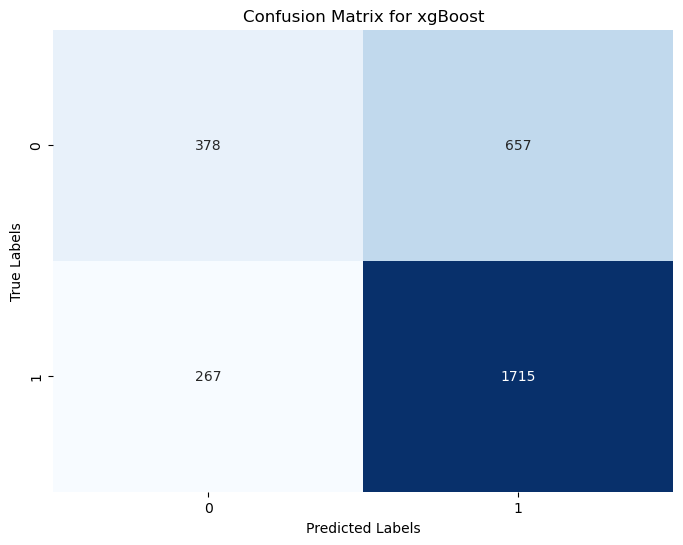

----------------------
Classifier: AdaBoost
Accuracy: 0.6721909181305933
Precision: 0.6758767268862912
Recall: 0.9626639757820383
F1-score: 0.7941727367325702


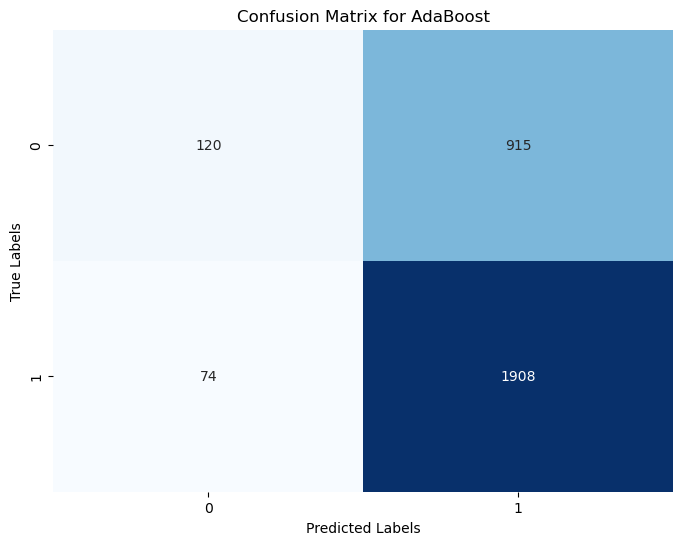

----------------------
Classifier: GradientBoost
Accuracy: 0.6808087504143189
Precision: 0.6802263883975946
Recall: 0.9702320887991928
F1-score: 0.7997504678727386


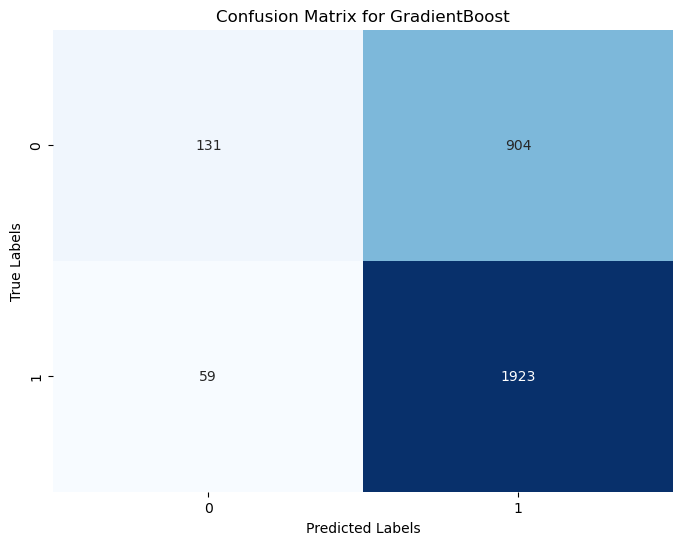

----------------------
Classifier: Logistic Regression
Accuracy: 0.6579383493536626
Precision: 0.6575978765759788
Recall: 1.0
F1-score: 0.7934347477982385


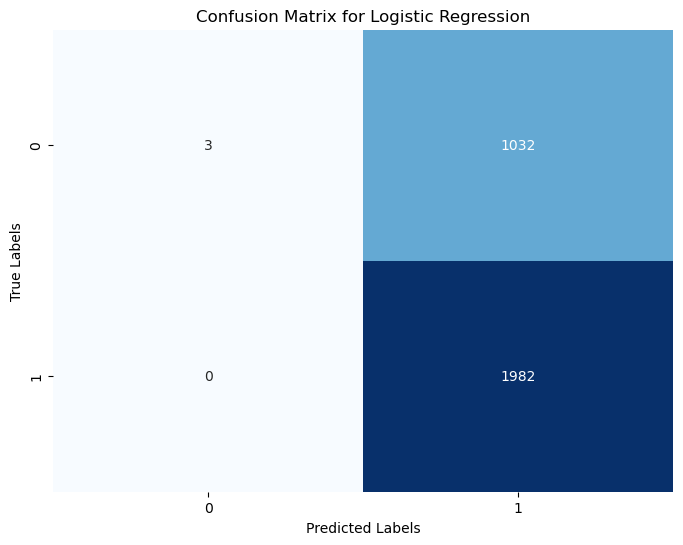

----------------------
Classifier: Random Forest
Accuracy: 0.6990387802452768
Precision: 0.7300771208226221
Recall: 0.8597376387487387
F1-score: 0.7896200185356812


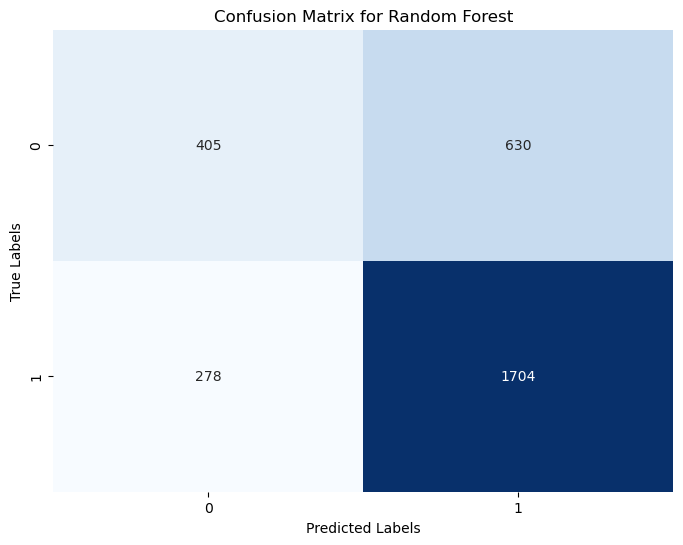

----------------------
Classifier: Random Forest with AdaBoost
Accuracy: 0.7096453430560159
Precision: 0.7349192863211554
Recall: 0.8728557013118062
F1-score: 0.7979704797047971


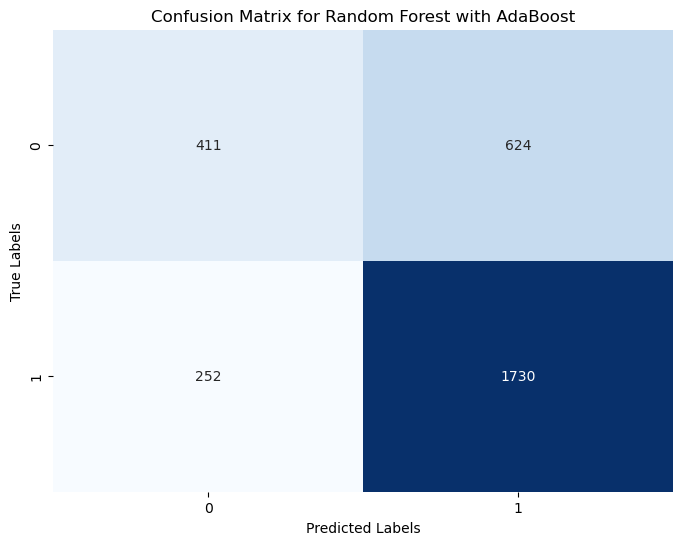

----------------------
Classifier: KNN
Accuracy: 0.6877693072588664
Precision: 0.7333931777378815
Recall: 0.8244197780020182
F1-score: 0.7762470308788598


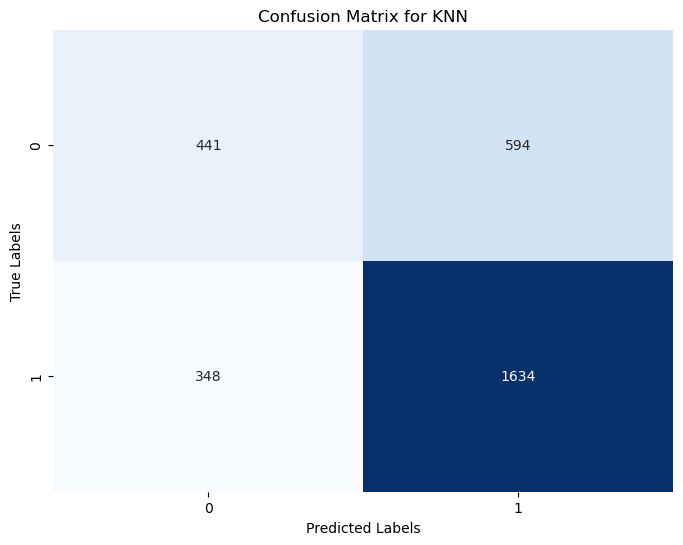

----------------------
Classifier: Decision Tree
Accuracy: 0.6244613854822672
Precision: 0.7123561780890445
Recall: 0.7184661957618567
F1-score: 0.7153981411705602


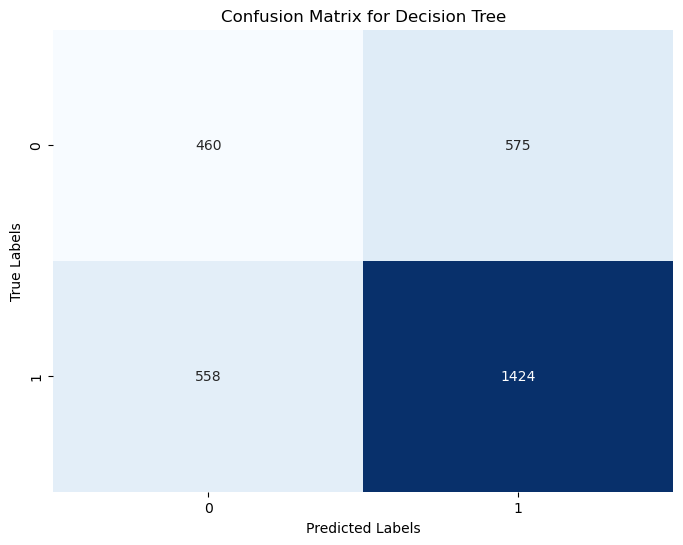

----------------------
Classifier: SVM
Accuracy: 0.6579383493536626
Precision: 0.6575978765759788
Recall: 1.0
F1-score: 0.7934347477982385


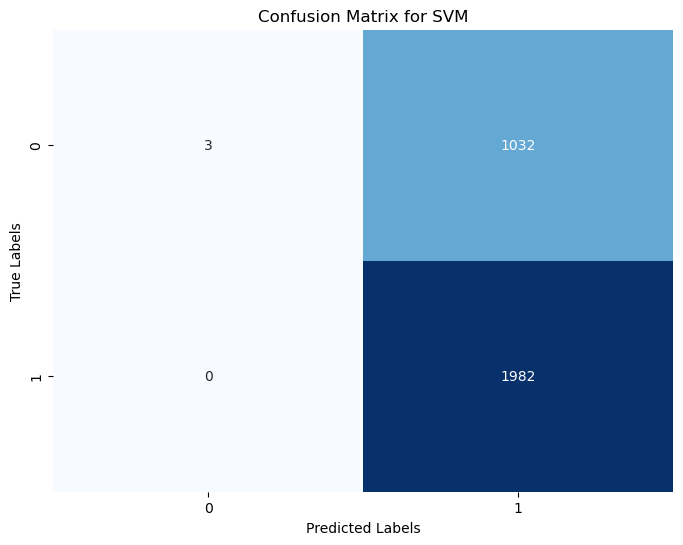

----------------------
Classifier: Naive Bayes
Accuracy: 0.6579383493536626
Precision: 0.6575978765759788
Recall: 1.0
F1-score: 0.7934347477982385


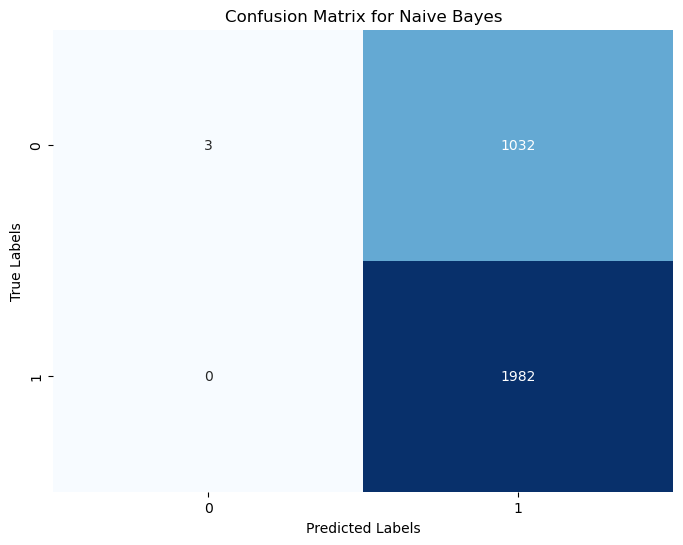

----------------------


In [91]:
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Create a heatmap of the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    print("----------------------")

# Evaluation

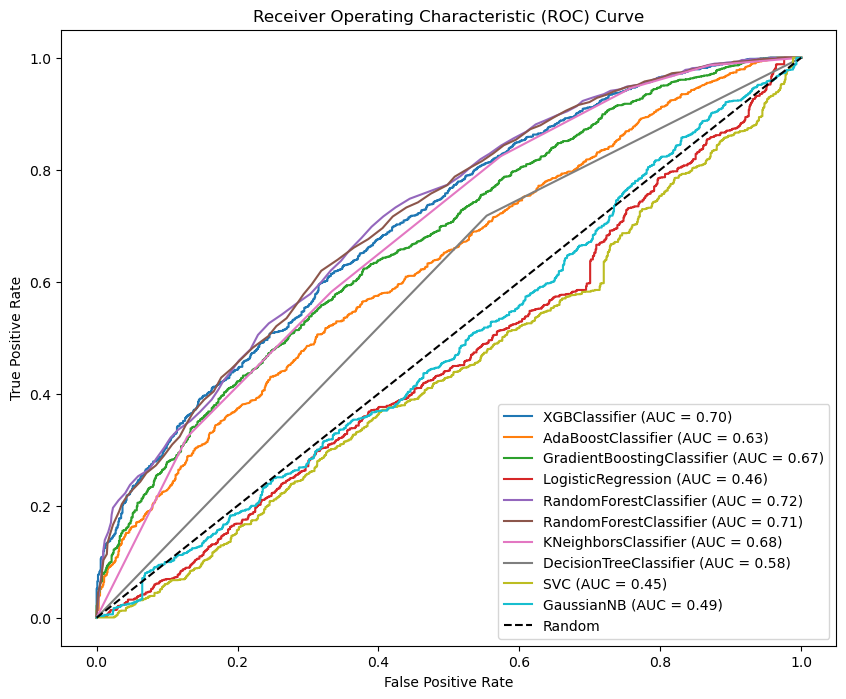

In [92]:
# Initialize classifiers
classifiers = [
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(),
    RandomForestClassifier(),
    RandomForestClassifier(n_estimators=100),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    SVC(probability=True),  # Enable probability estimation for SVC
    GaussianNB()
]

# Plot ROC curve for each classifier
plt.figure(figsize=(10, 8))
for classifier in classifiers:
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Make predictions on the testing set
    if hasattr(classifier, "predict_proba"):
        # Use predict_proba for classifiers that support it
        y_pred_prob = classifier.predict_proba(X_test)[:, 1]
    else:
        # Use decision_function for classifiers that don't support predict_proba
        y_pred_prob = classifier.decision_function(X_test)
    
    # Compute the false positive rate, true positive rate, and thresholds
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    
    # Calculate the area under the ROC curve
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{classifier.__class__.__name__} (AUC = {roc_auc:.2f})')

# Set plot labels and title
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()


In [93]:
# Train and save the XGBoost classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
model_file_xgb = 'model_xgBoost.pkl'
joblib.dump(xgb_classifier, model_file_xgb)
print(f'Saved XGBoost model to {model_file_xgb}')

# Train and save the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(X_train, y_train)
model_file_adaboost = 'model_AdaBoost.pkl'
joblib.dump(adaboost_classifier, model_file_adaboost)
print(f'Saved AdaBoost model to {model_file_adaboost}')

# Train and save the GradientBoosting classifier
gradientboost_classifier = GradientBoostingClassifier()
gradientboost_classifier.fit(X_train, y_train)
model_file_gradientboost = 'model_GradientBoost.pkl'
joblib.dump(gradientboost_classifier, model_file_gradientboost)
print(f'Saved GradientBoosting model to {model_file_gradientboost}')

# Train and save the Random Forest classifier
randomforest_classifier = RandomForestClassifier()
randomforest_classifier.fit(X_train, y_train)
model_file_randomforest = 'model_RandomForest.pkl'
joblib.dump(randomforest_classifier, model_file_randomforest)
print(f'Saved Random Forest model to {model_file_randomforest}')

# Train and save the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression()
logistic_regression_classifier.fit(X_train, y_train)
model_file_logisticregression = 'model_LogisticRegression.pkl'
joblib.dump(logistic_regression_classifier, model_file_logisticregression)
print(f'Saved Logistic Regression model to {model_file_logisticregression}')

# Train and save the KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
model_file_knn = 'model_KNN.pkl'
joblib.dump(knn_classifier, model_file_knn)
print(f'Saved KNN model to {model_file_knn}')

# Train and save the Decision Tree classifier
decisiontree_classifier = DecisionTreeClassifier()
decisiontree_classifier.fit(X_train, y_train)
model_file_decisiontree = 'model_DecisionTree.pkl'
joblib.dump(decisiontree_classifier, model_file_decisiontree)
print(f'Saved Decision Tree model to {model_file_decisiontree}')

# Train and save the SVM classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
model_file_svm = 'model_SVM.pkl'
joblib.dump(svm_classifier, model_file_svm)
print(f'Saved SVM model to {model_file_svm}')

Saved XGBoost model to model_xgBoost.pkl
Saved AdaBoost model to model_AdaBoost.pkl
Saved GradientBoosting model to model_GradientBoost.pkl
Saved Random Forest model to model_RandomForest.pkl
Saved Logistic Regression model to model_LogisticRegression.pkl
Saved KNN model to model_KNN.pkl
Saved Decision Tree model to model_DecisionTree.pkl
Saved SVM model to model_SVM.pkl
